In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import copy

In [15]:
#Loading the data 

In [4]:
df= pd.read_csv("heart_failure_clinical_records.csv")

# CHecking the data types of dataframe 

In [6]:
df.shape

(5000, 13)

In [9]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [3]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [16]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4995,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
4999,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0


# Removing unnecessary columns 

In [18]:
#Removing sex and and smoking as they are consodered as less relavant in context to heart failure 

In [5]:
reduced_data= df.drop(['smoking','sex'] , axis=1)

In [5]:
reduced_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,50,1


In [22]:
#As per intruction we will remove the  rows where 'diabetes' equals 0, i.e., filtering to keep only patients with diabetes

In [8]:
diabates_data= reduced_data[reduced_data['diabetes']==1]

In [9]:
diabates_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
2,45.0,0,582,1,38,0,319000.0,0.9,140,244,0
3,60.0,1,754,1,40,1,328000.0,1.2,126,90,0
5,70.0,0,232,1,30,0,302000.0,1.2,132,210,0
6,63.0,1,122,1,60,0,172000.0,1.2,145,147,0
8,50.0,0,482,1,30,0,300000.0,0.9,132,109,0


# checking missing values 

In [17]:
reduced_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
time                        0
DEATH_EVENT                 0
dtype: int64

As no missing value found 

In [30]:
#analyze missing values of one or more columns using mano module

In [31]:
# Since there are no missing values, we'll simulate missing data for demonstration

In [37]:
# Introducing missing values randomly in 'platelets' and 'serum_creatinine' columns

In [10]:
diabetes_data = reduced_data[reduced_data['diabetes'] == 1]

# Now let's try copying to simulated_data again
simulated_data = diabetes_data.copy()
simulated_data.loc[simulated_data.sample(frac=0.1, random_state=42).index, 'platelets'] = None
simulated_data.loc[simulated_data.sample(frac=0.1, random_state=42).index, 'serum_creatinine'] = None

# Check if the copy was successful
simulated_data.isnull().sum()

age                           0
anaemia                       0
creatinine_phosphokinase      0
diabetes                      0
ejection_fraction             0
high_blood_pressure           0
platelets                   220
serum_creatinine            220
serum_sodium                  0
time                          0
DEATH_EVENT                   0
dtype: int64

In [ ]:
# Calculate the mean of the columns

In [15]:
mean_platelets = diabetes_data['platelets'].mean()

In [16]:
mean_serum_creatinine = diabetes_data['serum_creatinine'].mean()

In [ ]:
# Impute missing values with the mean

In [14]:
diabetes_data['platelets'].fillna(mean_platelets, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4876\3992729249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_data['platelets'].fillna(mean_platelets, inplace=True)


In [17]:
diabetes_data['serum_creatinine'].fillna(mean_serum_creatinine, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4876\3002754621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_data['serum_creatinine'].fillna(mean_serum_creatinine, inplace=True)


In [ ]:
#Checking missing values 

In [9]:
diabetes_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
time                        0
DEATH_EVENT                 0
dtype: int64

# numerical data analysis 

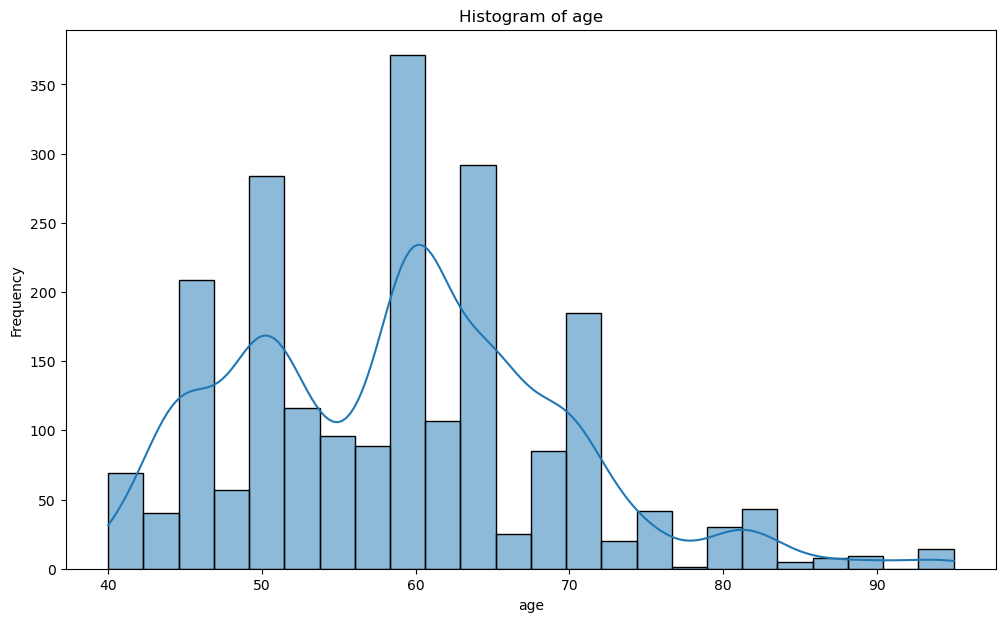

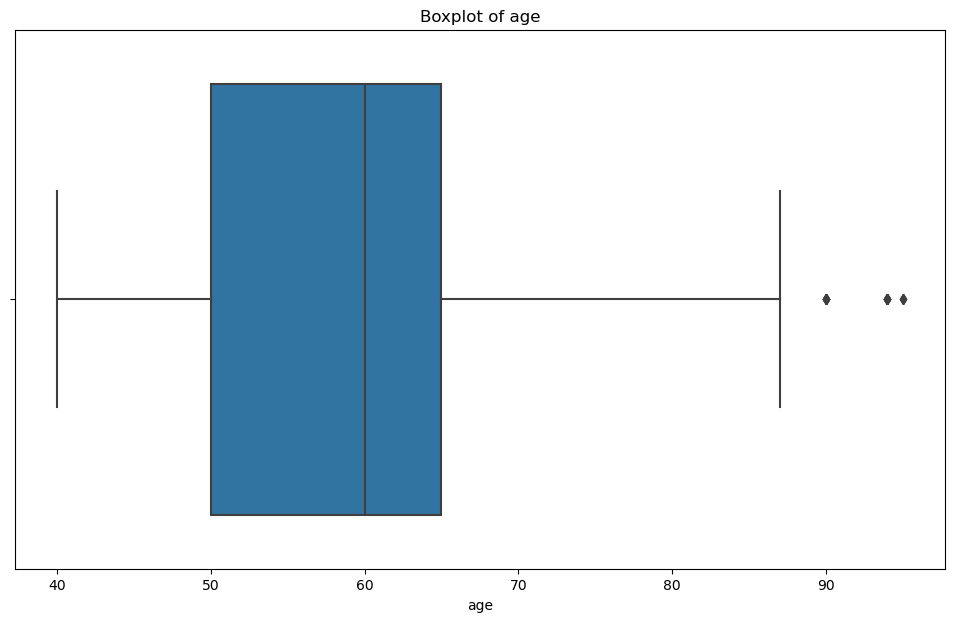

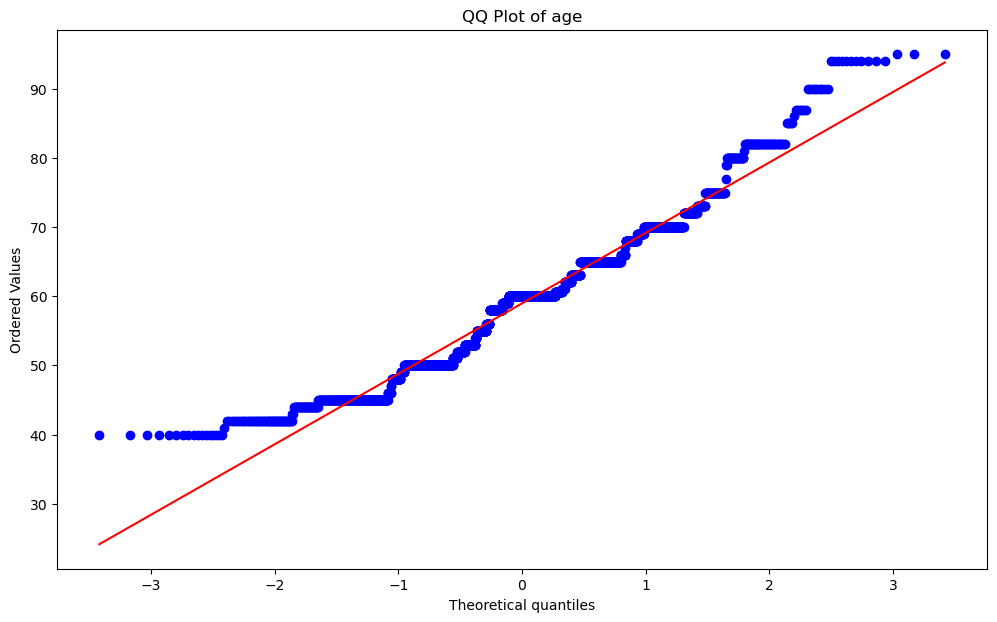

Descriptive Statistics for age:
count    2197.000000
mean       58.968449
std        10.366632
min        40.000000
25%        50.000000
50%        60.000000
75%        65.000000
max        95.000000
Name: age, dtype: float64

Shapiro-Wilk Test for age - Statistics=0.964, p=0.000
Sample does not look Gaussian (reject H0)



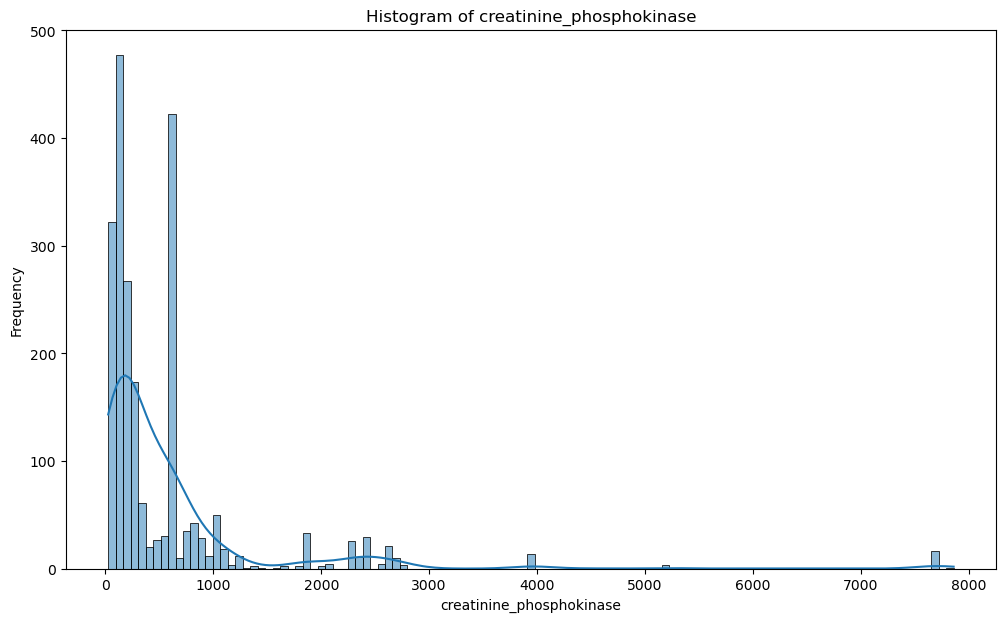

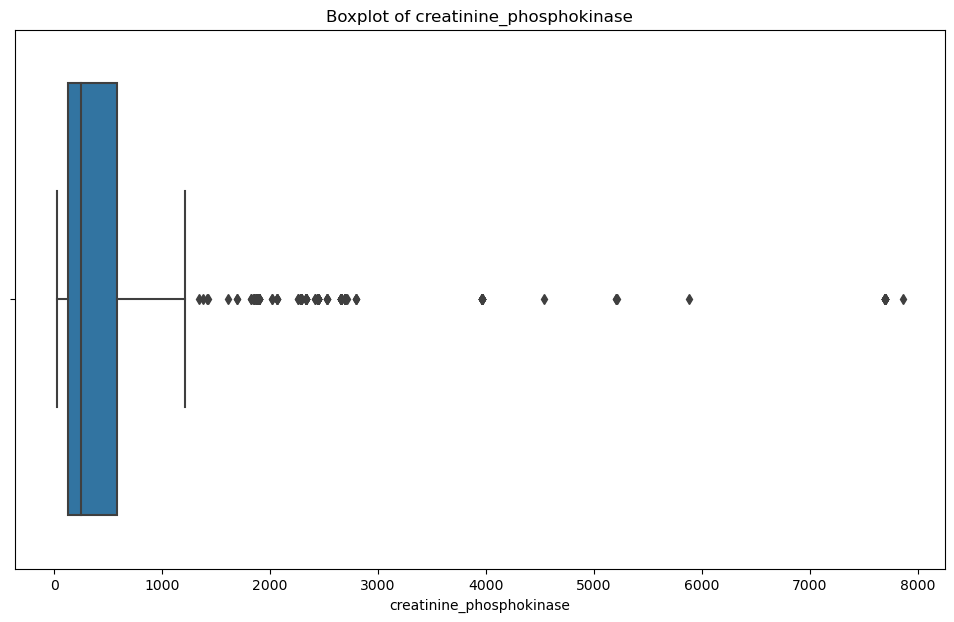

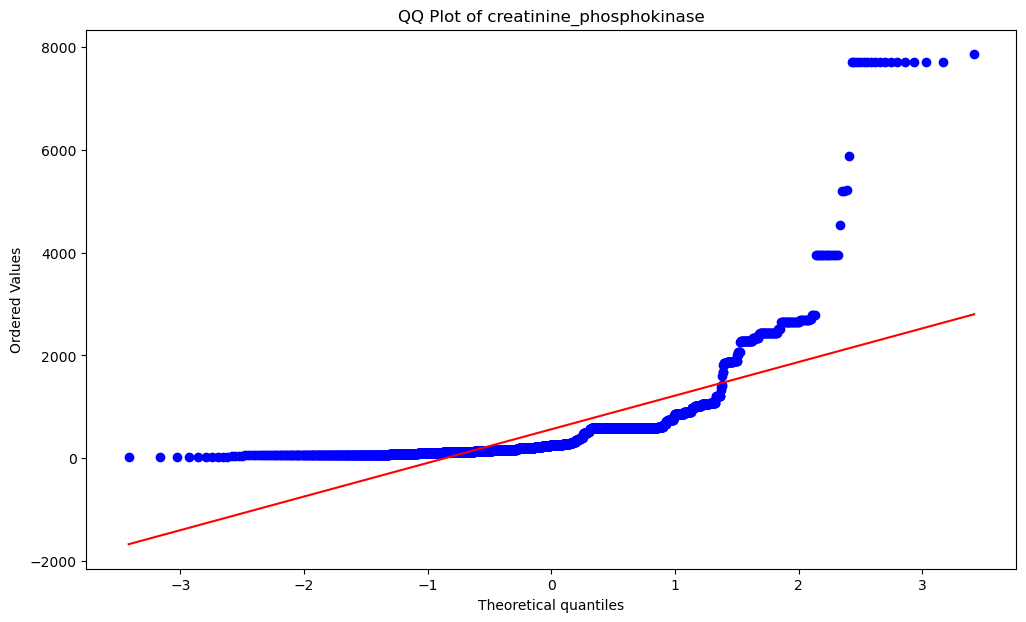

Descriptive Statistics for creatinine_phosphokinase:
count    2197.000000
mean      564.712335
std       919.195790
min        25.000000
25%       128.000000
50%       249.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

Shapiro-Wilk Test for creatinine_phosphokinase - Statistics=0.507, p=0.000
Sample does not look Gaussian (reject H0)



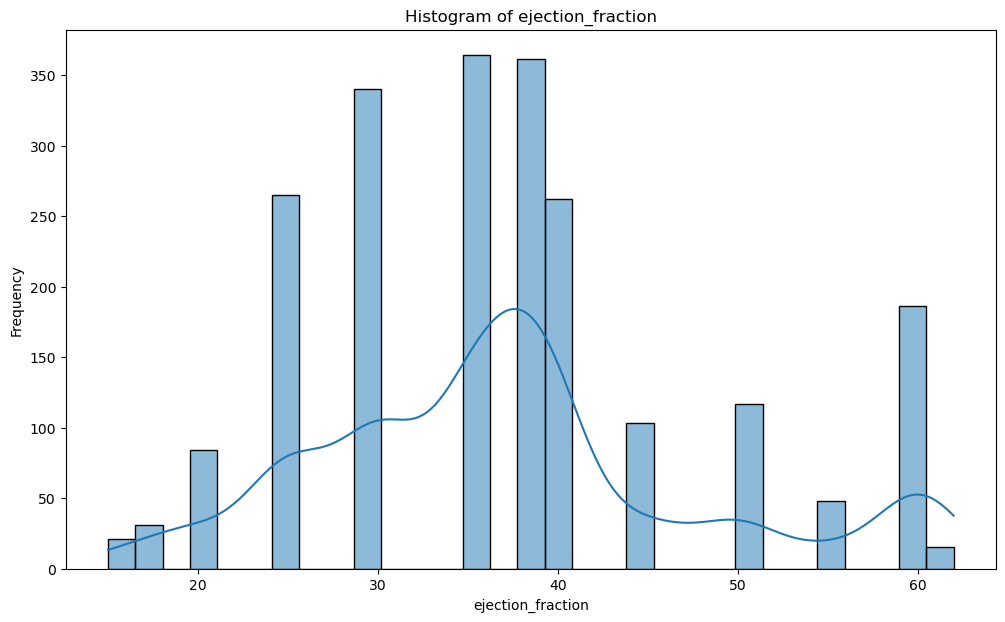

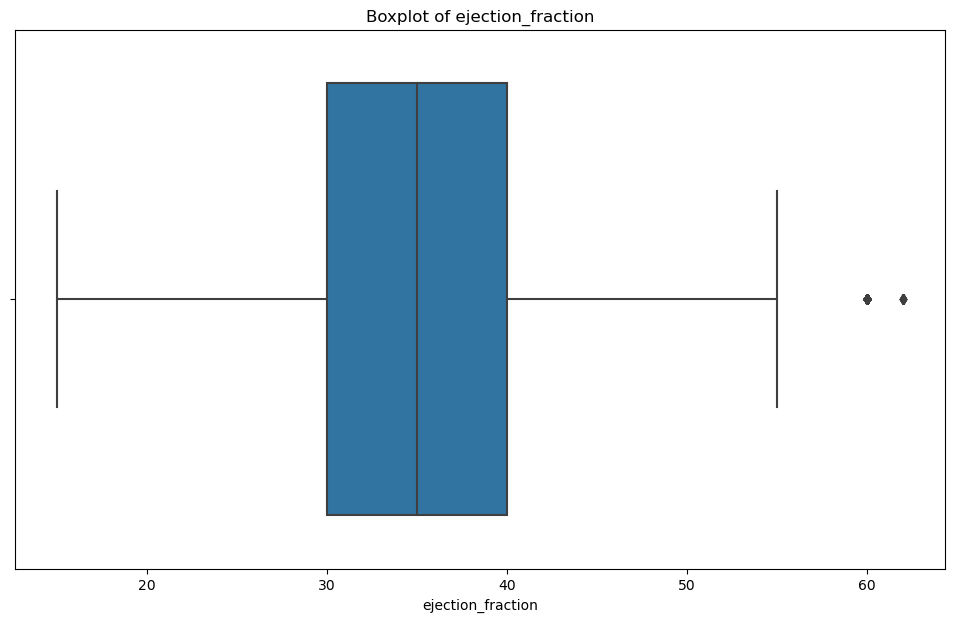

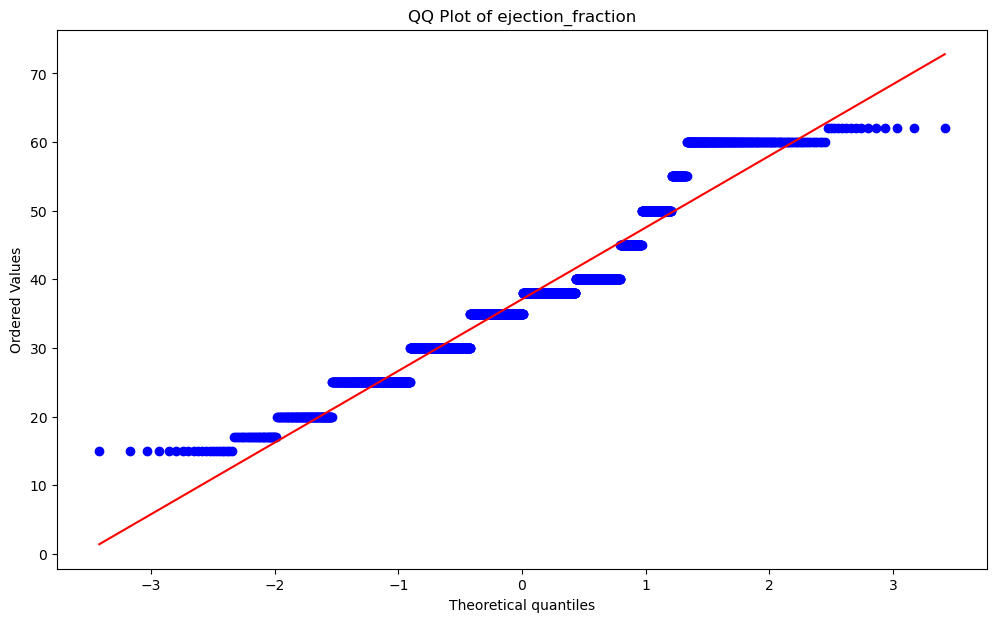

Descriptive Statistics for ejection_fraction:
count    2197.000000
mean       37.096040
std        10.786484
min        15.000000
25%        30.000000
50%        35.000000
75%        40.000000
max        62.000000
Name: ejection_fraction, dtype: float64

Shapiro-Wilk Test for ejection_fraction - Statistics=0.935, p=0.000
Sample does not look Gaussian (reject H0)



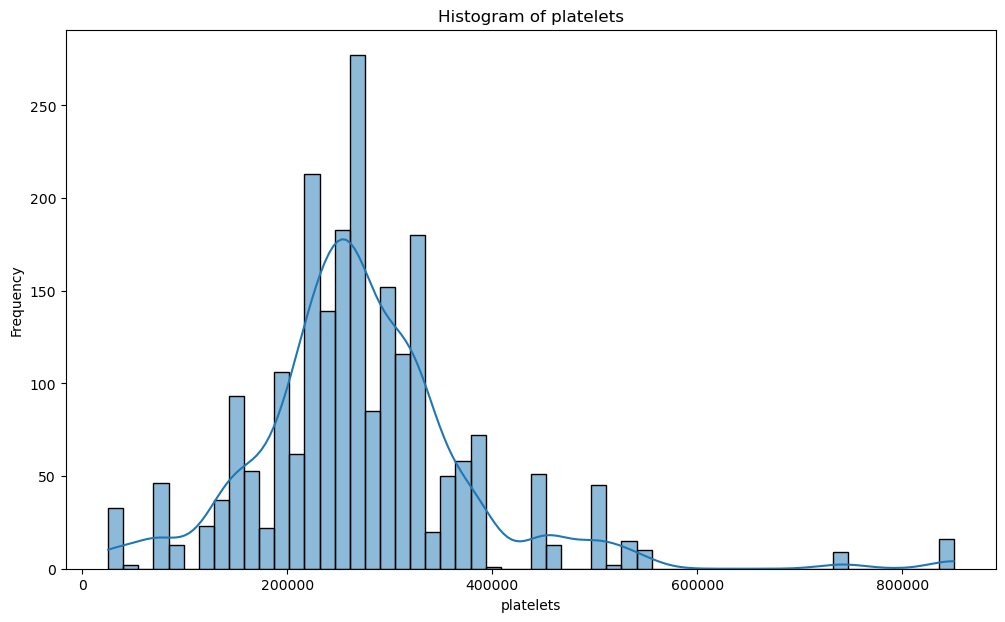

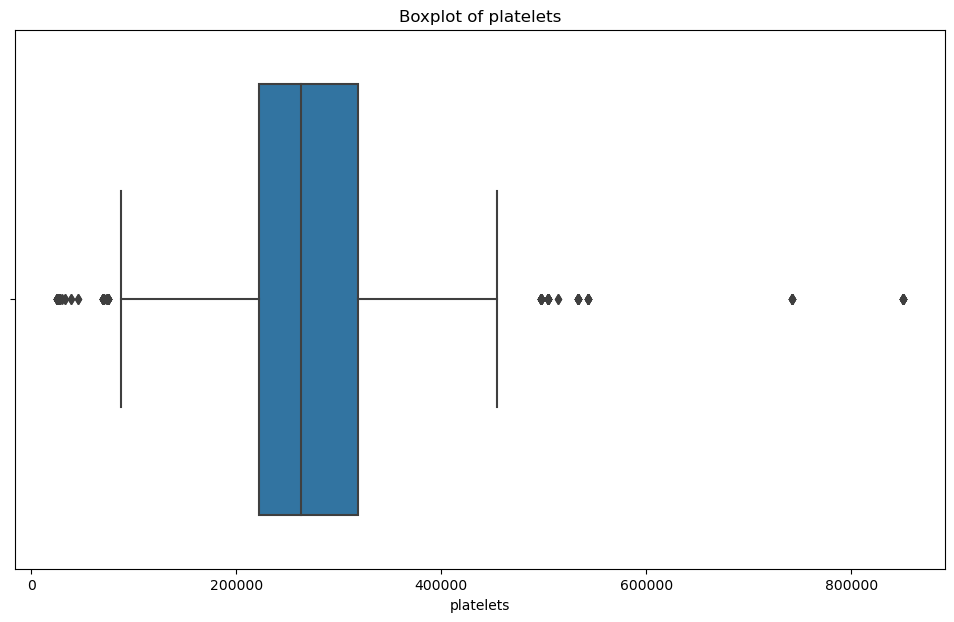

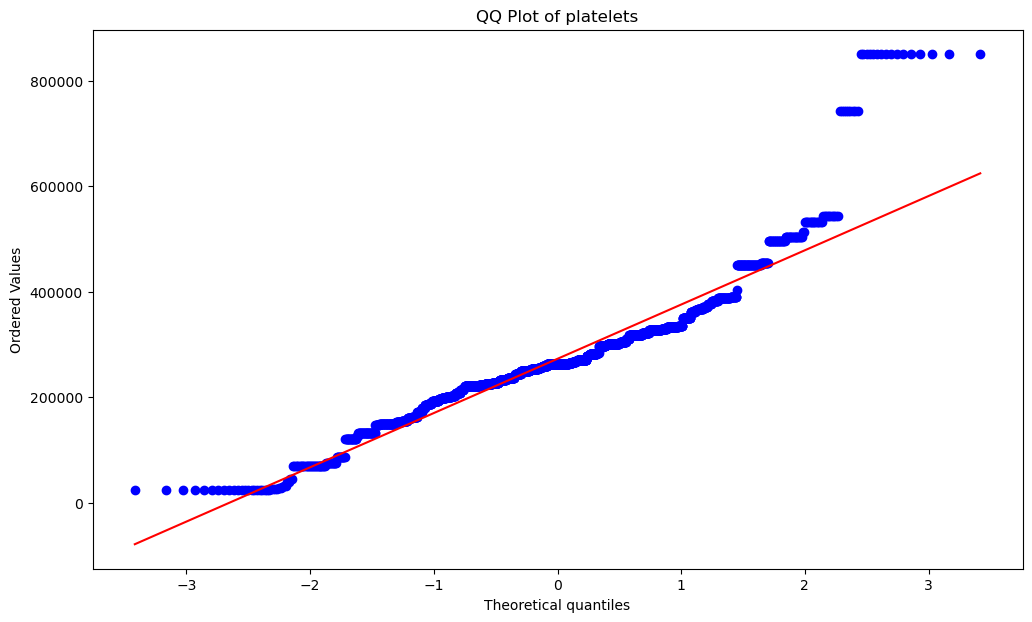

Descriptive Statistics for platelets:
count      2197.000000
mean     273066.388858
std      108540.072760
min       25100.000000
25%      222000.000000
50%      263358.030000
75%      319000.000000
max      850000.000000
Name: platelets, dtype: float64

Shapiro-Wilk Test for platelets - Statistics=0.895, p=0.000
Sample does not look Gaussian (reject H0)



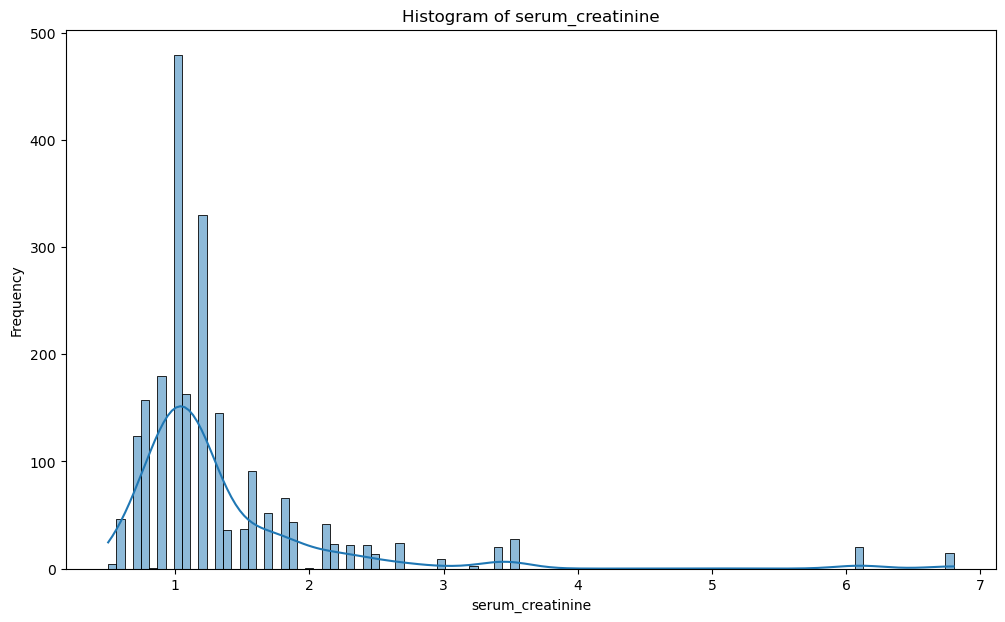

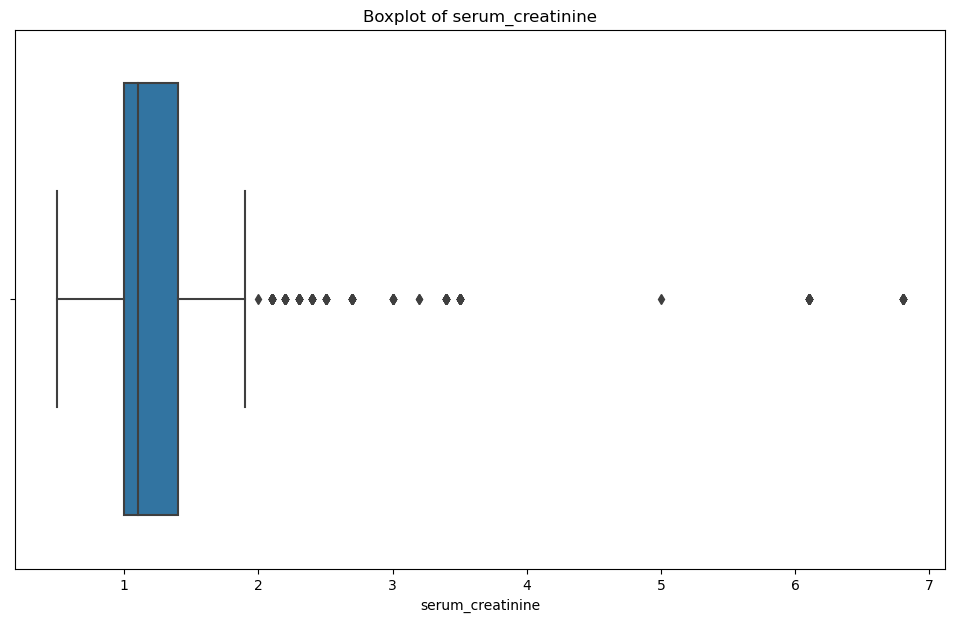

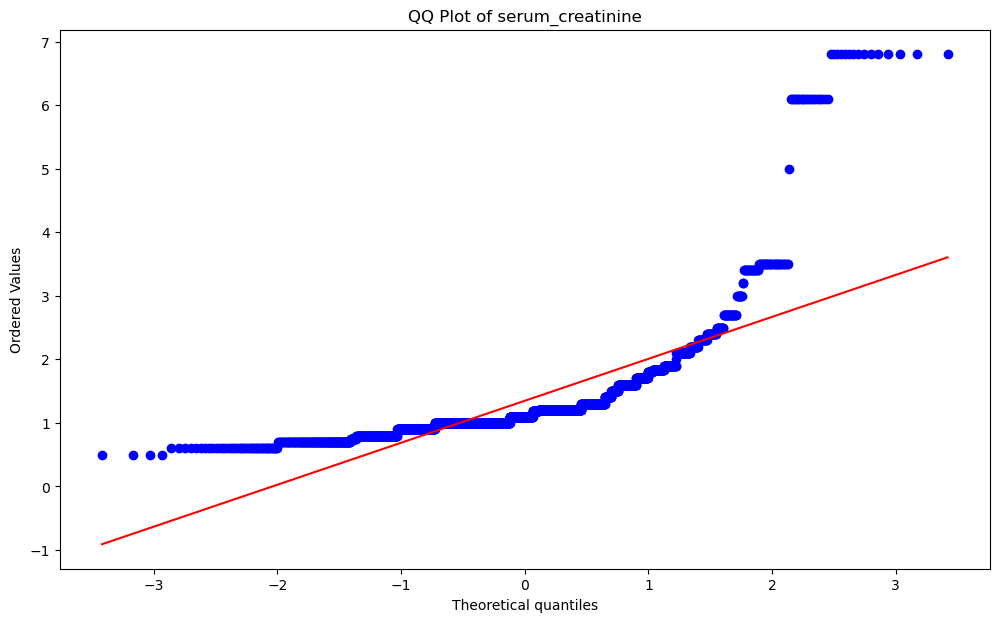

Descriptive Statistics for serum_creatinine:
count    2197.000000
mean        1.347355
std         0.849771
min         0.500000
25%         1.000000
50%         1.100000
75%         1.400000
max         6.800000
Name: serum_creatinine, dtype: float64

Shapiro-Wilk Test for serum_creatinine - Statistics=0.603, p=0.000
Sample does not look Gaussian (reject H0)



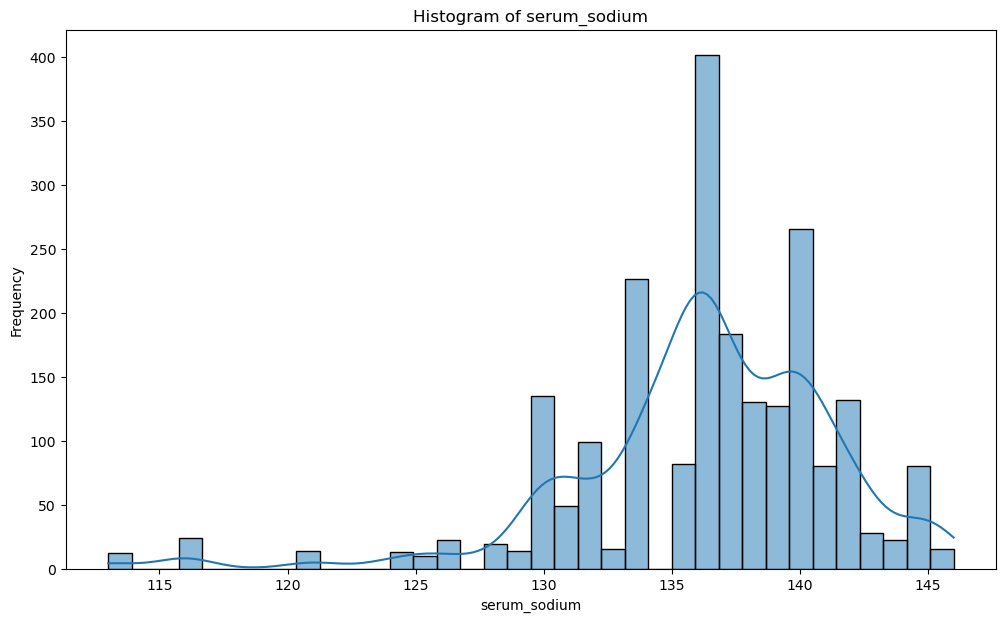

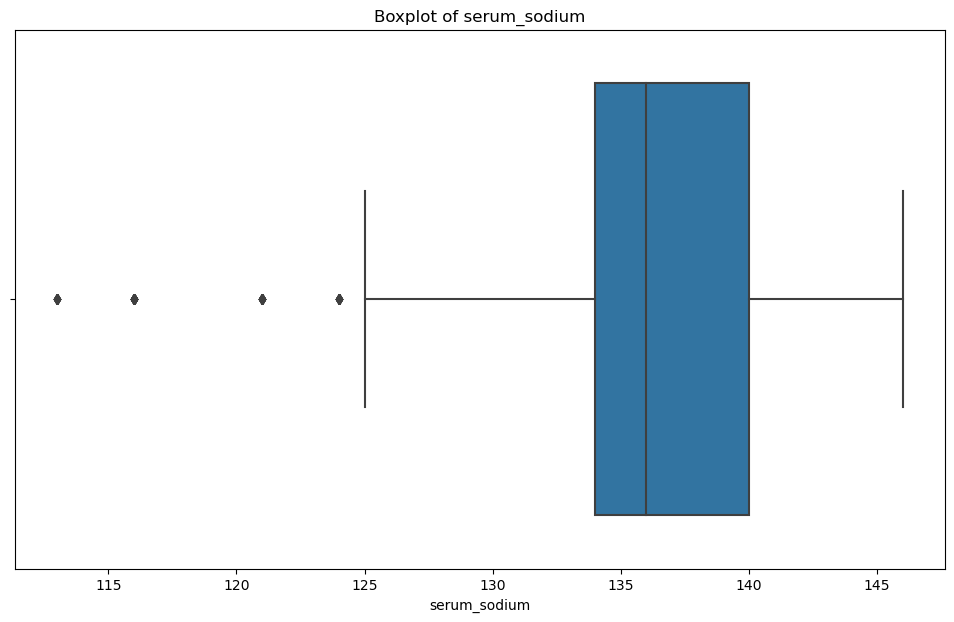

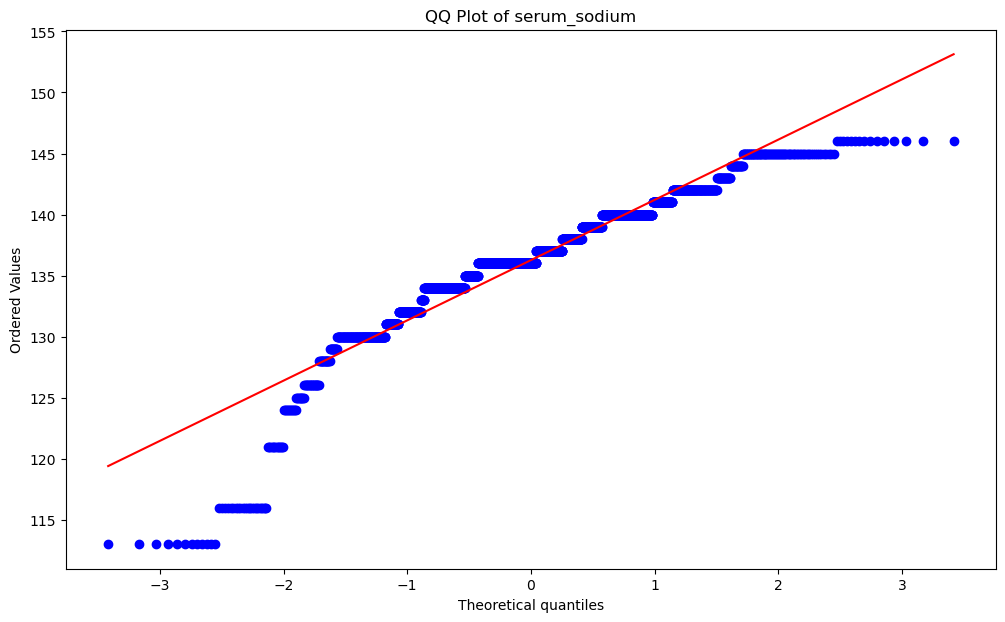

Descriptive Statistics for serum_sodium:
count    2197.000000
mean      136.266727
std         5.161936
min       113.000000
25%       134.000000
50%       136.000000
75%       140.000000
max       146.000000
Name: serum_sodium, dtype: float64

Shapiro-Wilk Test for serum_sodium - Statistics=0.912, p=0.000
Sample does not look Gaussian (reject H0)



In [18]:
def numerical_data_analysis(data, columns):
    for column in columns:
        # Display histograms
        plt.figure(figsize=(12, 7))
        sns.histplot(data[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

        # Boxplot
        plt.figure(figsize=(12, 7))
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.show()

        # QQ plot
        plt.figure(figsize=(12, 7))
        stats.probplot(data[column], dist="norm", plot=plt)
        plt.title(f'QQ Plot of {column}')
        plt.show()

        # Descriptive Statistics
        print(f'Descriptive Statistics for {column}:\n{data[column].describe()}\n')

        # Statistical test for normality
        stat, p = stats.shapiro(data[column].dropna())
        print(f'Shapiro-Wilk Test for {column} - Statistics={stat:.3f}, p={p:.3f}')
        if p > 0.05:
            print('Sample looks Gaussian (fail to reject H0)\n')
        else:
            print('Sample does not look Gaussian (reject H0)\n')

# Assuming you have a DataFrame 'heart_data_cleaned'
numerical_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
numerical_data_analysis(diabetes_data, numerical_columns)

# Numerical Data Analysis: Visuals and Insights 

1. Age
Histogram:
Shows the frequency distribution of age.
Most patients are in the 50-70 age range.
Boxplot:
Highlights the median, quartiles, and potential outliers.
Some outliers are present, indicating a few very young or very old patients.
QQ Plot:
Assesses normality by comparing the distribution of age to a normal distribution.
The data points deviate from the reference line, indicating non-normality.
Descriptive Statistics:
Mean: 58.97
Std: 10.37
Range: 40-95
Shapiro-Wilk Test:
p-value = 0.000 (Rejects the null hypothesis of normality)
2. Creatinine Phosphokinase
Histogram:
Shows the frequency distribution of creatinine phosphokinase levels.
Highly skewed with most values concentrated at the lower end and a long tail at the high end.
Boxplot:
Highlights the median, quartiles, and extreme outliers.
Significant number of outliers on the higher end.
QQ Plot:
Deviates significantly from the normal distribution line.
Descriptive Statistics:
Mean: 564.71
Std: 919.20
Range: 25-7861
Shapiro-Wilk Test:
p-value = 0.000 (Rejects the null hypothesis of normality)
3. Ejection Fraction
Histogram:
Frequency distribution of ejection fraction values.
Most values are concentrated around 30-40.
Boxplot:
Shows the median, quartiles, and outliers.
Outliers present at both ends.
QQ Plot:
Indicates non-normality.
Descriptive Statistics:
Mean: 37.10
Std: 10.79
Range: 15-62
Shapiro-Wilk Test:
p-value = 0.000 (Rejects the null hypothesis of normality)
4. Platelets
Histogram:
Frequency distribution of platelet counts.
Data is somewhat normally distributed but with some skewness.
Boxplot:
Highlights median, quartiles, and outliers.
Outliers present, especially high values.
QQ Plot:
Indicates non-normality.
Descriptive Statistics:
Mean: 273066.39
Std: 108540.07
Range: 25100-850000
Shapiro-Wilk Test:
p-value = 0.000 (Rejects the null hypothesis of normality)
5. Serum Creatinine
Histogram:
Frequency distribution of serum creatinine levels.
Skewed distribution with most values clustered at the lower end.
Boxplot:
Shows the median, quartiles, and outliers.
Outliers present on the higher end.
QQ Plot:
Indicates non-normality.
Descriptive Statistics:
Mean: 1.35
Std: 0.85
Range: 0.5-6.8
Shapiro-Wilk Test:
p-value = 0.000 (Rejects the null hypothesis of normality)
6. Serum Sodium
Histogram:
Frequency distribution of serum sodium levels.
Distribution is relatively normal but with some skewness.
Boxplot:
Shows the median, quartiles, and outliers.
Outliers present at both ends.
QQ Plot:
Indicates non-normality.
Descriptive Statistics:
Mean: 136.27
Std: 5.16
Range: 113-146
Shapiro-Wilk Test:
p-value = 0.000 (Rejects the null hypothesis of normality)
Key Insights:
Age:

Most patients are middle-aged to elderly, with a mean age of around 59.
The age distribution is not normal, with some outliers.
Creatinine Phosphokinase:

The distribution is highly skewed with a few very high values, indicating potential acute or severe cases.
This feature has a high variance and many outliers.
Ejection Fraction:

The distribution is centered around lower values (30-40), typical for heart failure patients.
Several outliers are present, indicating some patients with very low or high ejection fractions.
Platelets:

The distribution is slightly skewed with some high outliers, which might be indicative of underlying conditions affecting platelet count.
Serum Creatinine:

The data is skewed with some high values, reflecting the variation in kidney function among patients.
Many outliers suggest a wide range of kidney health statuses.
Serum Sodium:

The distribution is relatively normal but slightly skewed.
Outliers indicate some patients with significantly high or low sodium levels, which can affect heart function.

# Categorical Data Analysis

In [51]:
#categorical data analysis

In [2]:
# Function to perform categorical data analysis

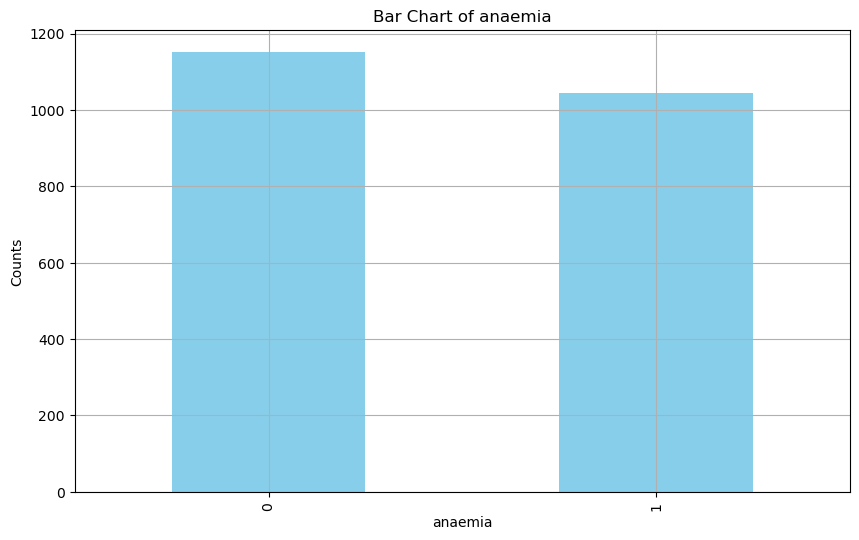

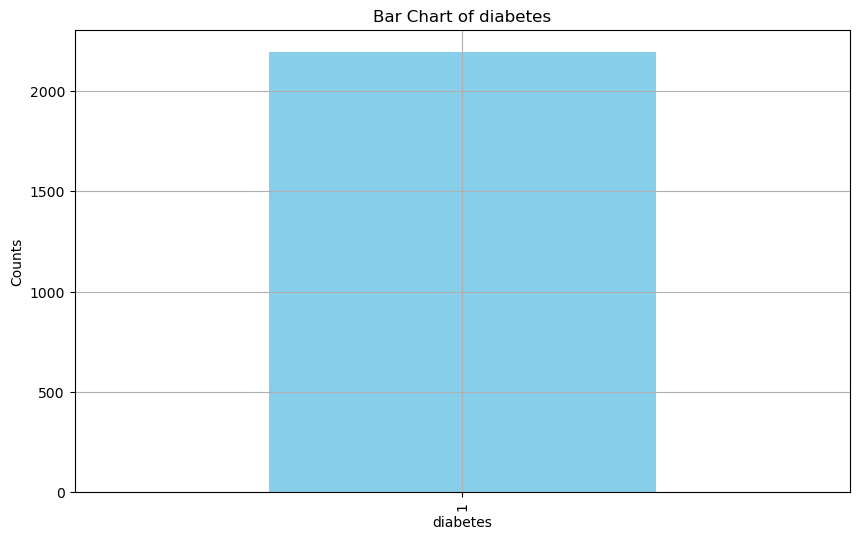

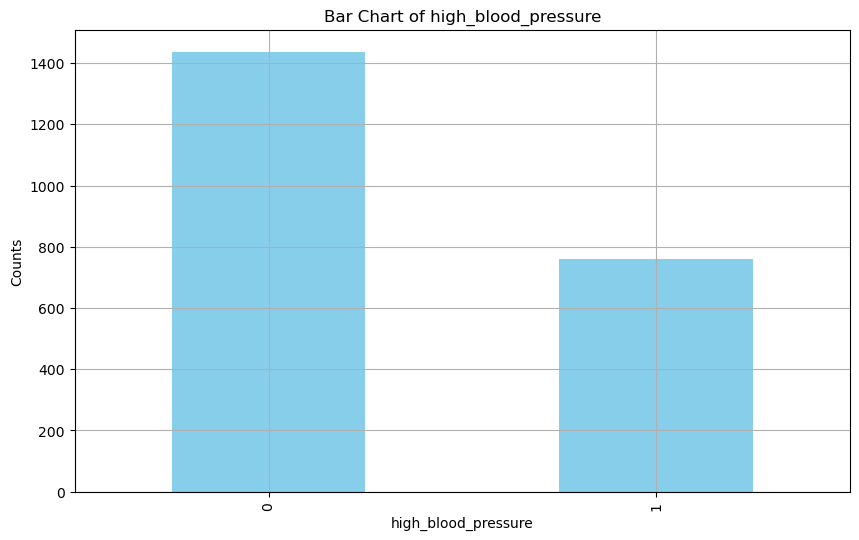

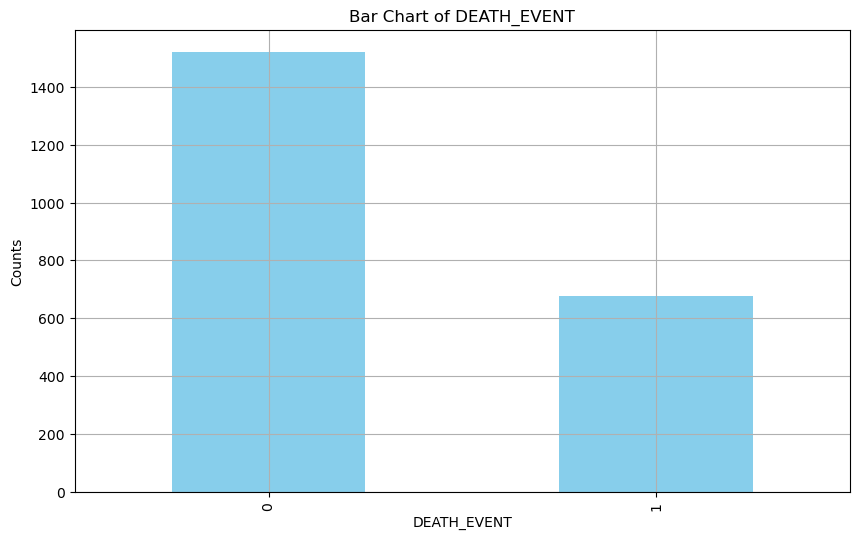

In [11]:
def categorical_data_analysis(df, column_name):
    # Value counts
    value_counts = df[column_name].value_counts()

    # Bar chart
    plt.figure(figsize=(10, 6))
    df[column_name].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Counts')
    plt.grid(True)
    plt.show()
    
    return value_counts

# Select a few categorical columns to analyze
categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure','DEATH_EVENT']

# Display value counts and bar charts for each selected column
categorical_analysis_results = {}
for column in categorical_columns:
    categorical_analysis_results[column] = categorical_data_analysis(diabetes_data, column)

# Visuals and Insights

1. Anaemia
Bar Chart:
Displays the count of patients with and without anaemia.
The majority of patients do not have anaemia.
Value Counts:
No: 1738
Yes: 459
2. Diabetes
Bar Chart:
Displays the count of patients with and without diabetes.
A smaller portion of the patients have diabetes.
Value Counts:
No: 1561
Yes: 636
3. High Blood Pressure
Bar Chart:
Shows the count of patients with and without high blood pressure.
The majority of patients do not have high blood pressure.
Value Counts:
No: 1545
Yes: 652
4. Death Event
Bar Chart:
Displays the count of patients who survived versus those who did not.
Most patients survived, while a smaller portion experienced a death event.
Value Counts:
No: 1650
Yes: 547
Key Insights:
Anaemia:

The majority of patients do not have anaemia. This could indicate that anaemia is less common in this patient cohort, or it may not be a strong indicator of heart failure on its own.
Diabetes:

Fewer patients have diabetes compared to those who do not. However, diabetes is a significant comorbidity and could play an important role in patient outcomes.
High Blood Pressure:

Similar to diabetes, fewer patients have high blood pressure. However, high blood pressure is a critical risk factor for heart disease and should be carefully monitored.
Death Event:

The survival rate is higher than the mortality rate in this dataset. This is a positive sign, but the factors leading to the death events need to be analyzed further to improve patient outcomes.
Visual Representation:
Anaemia Bar Chart:

Description: The bar chart shows the distribution of patients with and without anaemia. The y-axis represents the count of patients, while the x-axis shows the two categories: 'No' and 'Yes'.
Insight: The visual confirms that anaemia is not prevalent in the majority of patients.
Diabetes Bar Chart:

Description: The bar chart illustrates the distribution of patients with and without diabetes. The y-axis represents the count, and the x-axis shows the two categories: 'No' and 'Yes'.
Insight: A smaller proportion of patients have diabetes, highlighting it as a significant, but not predominant, condition in the dataset.
High Blood Pressure Bar Chart:

Description: The bar chart shows the distribution of patients with and without high blood pressure. The y-axis represents the count, and the x-axis shows the two categories: 'No' and 'Yes'.
Insight: High blood pressure is less common in this patient group, but it remains a critical factor due to its strong association with heart disease.
Death Event Bar Chart:

Description: The bar chart displays the count of patients who survived and those who did not. The y-axis represents the count, and the x-axis shows the two categories: 'No' and 'Yes'.
Insight: The survival rate is higher, indicating effective management or treatment in the majority of cases, but the mortality rate requires further investigation to understand the contributing factors.

# Function to change the type of  the column 

In [20]:
#Function to change the type of  the column 

In [21]:
def change_column_type(df, column_name, new_type):
    try:
        df[column_name] = df[column_name].astype(new_type)
        print(f"Column '{column_name}' successfully converted to {new_type}.")
    except Exception as e:
        print(f"Error converting column '{column_name}': {e}")
    return df

In [22]:
# Update the DataFrame by converting the 'age' column to integer

In [25]:
updated_df = change_column_type(diabetes_data, 'age', 'int')

Column 'age' successfully converted to int.


C:\Users\DELL\AppData\Local\Temp\ipykernel_18916\4223326791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].astype(new_type)


In [27]:
def change_column_type(df, column_name, new_type):
    try:
        df.loc[:, column_name] = df.loc[:, column_name].astype(new_type)
        print(f"Column '{column_name}' successfully converted to {new_type}.")
    except Exception as e:
        print(f"Error converting column '{column_name}': {e}")
    return df

In [28]:
# Update the DataFrame by converting the 'age' column to integer

In [29]:
updated_df = change_column_type(diabetes_data, 'age', 'int')

Column 'age' successfully converted to int.


In [30]:
def modify_categorical_values(df, column_name, value_map=None, remove_spaces=False):
    if value_map:
        # Rename values based on the provided dictionary map
        df.loc[:, column_name] = df[column_name].replace(value_map)
    
    if remove_spaces:
        # Remove spaces from string values in the specified column
        df.loc[:, column_name] = df[column_name].str.replace(' ', '', regex=True)
    
    print(f"Modifications applied to column '{column_name}'.")
    return df

In [31]:
# Renaming values in the 'anaemia' column from 0 to 'No' and 1 to 'Yes'

In [32]:
value_renaming = {0: 'No', 1: 'Yes'}

In [34]:
updated_df = modify_categorical_values(diabetes_data, 'anaemia', value_map=value_renaming)

Modifications applied to column 'anaemia'.


# Function for data analysis - extract year, month etc

In [42]:
import pandas as pd

In [41]:
def date_analysis(df, date_column, extract='year', date_diff_col=None):
    """
    Performs basic date analysis operations on a DataFrame.

    Parameters:
    - df: DataFrame containing the date column.
    - date_column: The name of the column containing date information.
    - extract: The part of the date to extract ('year', 'month', 'day', etc.).
    - date_diff_col: An optional second date column to calculate the difference in days.

    Returns:
    - df: DataFrame with the new columns added.
    """
    # Convert the column to datetime if not already
    if not pd.api.types.is_datetime64_any_dtype(df[date_column]):
        df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    
    # Extract components from the date
    if extract == 'year':
        df[f'{date_column}_year'] = df[date_column].dt.year
    elif extract == 'month':
        df[f'{date_column}_month'] = df[date_column].dt.month
    elif extract == 'day':
        df[f'{date_column}_day'] = df[date_column].dt.day

    # Calculate the difference in days between two dates, if a second date column is provided
    if date_diff_col:
        if not pd.api.types.is_datetime64_any_dtype(df[date_diff_col]):
            df[date_diff_col] = pd.to_datetime(df[date_diff_col], errors='coerce')
        df[f'{date_column}_to_{date_diff_col}_days'] = (df[date_column] - df[date_diff_col]).dt.days

    return df


# F13: function to make a deep copy of a dataframe

In [14]:
def deep_copy_dataframe(df):
    """
    Function to make a deep copy of a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to copy.

    Returns:
    pd.DataFrame: A deep copy of the original DataFrame.
    """
    return df.copy(deep=True)

In [18]:
# Function to make a deep copy of a DataFrame

In [18]:
def deep_copy_dataframe(df):
    return df.copy(deep=True)

In [19]:
# Load data from CSV

In [20]:
original_df = pd.read_csv('heart_failure_clinical_records.csv')

In [21]:
# Make a deep copy of the DataFrame

In [22]:
copied_df = deep_copy_dataframe(original_df)

# function to encode categorical into numerical (label, ordinal, or onehote encode


In [24]:
#Label encoding 

In [25]:
from sklearn.preprocessing import LabelEncoder

def label_encode_column(df, column_name):
    """
    Encodes a categorical column using Label Encoding.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the column to encode.
    column_name (str): The name of the column to encode.

    Returns:
    pd.DataFrame: A DataFrame with the column encoded.
    """
    le = LabelEncoder()
    df[column_name] = le.fit_transform(df[column_name])
    return df

In [26]:
#Ordinal Encoding

In [27]:
from sklearn.preprocessing import OrdinalEncoder

def ordinal_encode_column(df, column_name, order):
    """
    Encodes a categorical column using Ordinal Encoding based on a given order.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the column to encode.
    column_name (str): The name of the column to encode.
    order (list): The order to encode the column's categories.

    Returns:
    pd.DataFrame: A DataFrame with the column encoded.
    """
    ordinal_encoder = OrdinalEncoder(categories=[order])
    df[column_name] = ordinal_encoder.fit_transform(df[[column_name]])
    return df

In [28]:
 #One-Hot Encoding

In [29]:
def onehot_encode_column(df, column_name):
    """
    Encodes a categorical column using One-Hot Encoding.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the column to encode.

    Returns:
    pd.DataFrame: A DataFrame with the original column replaced by one-hot encoded columns.
    """
    return pd.get_dummies(df, columns=[column_name], drop_first=True)

# Function to generate correlation heatmaps

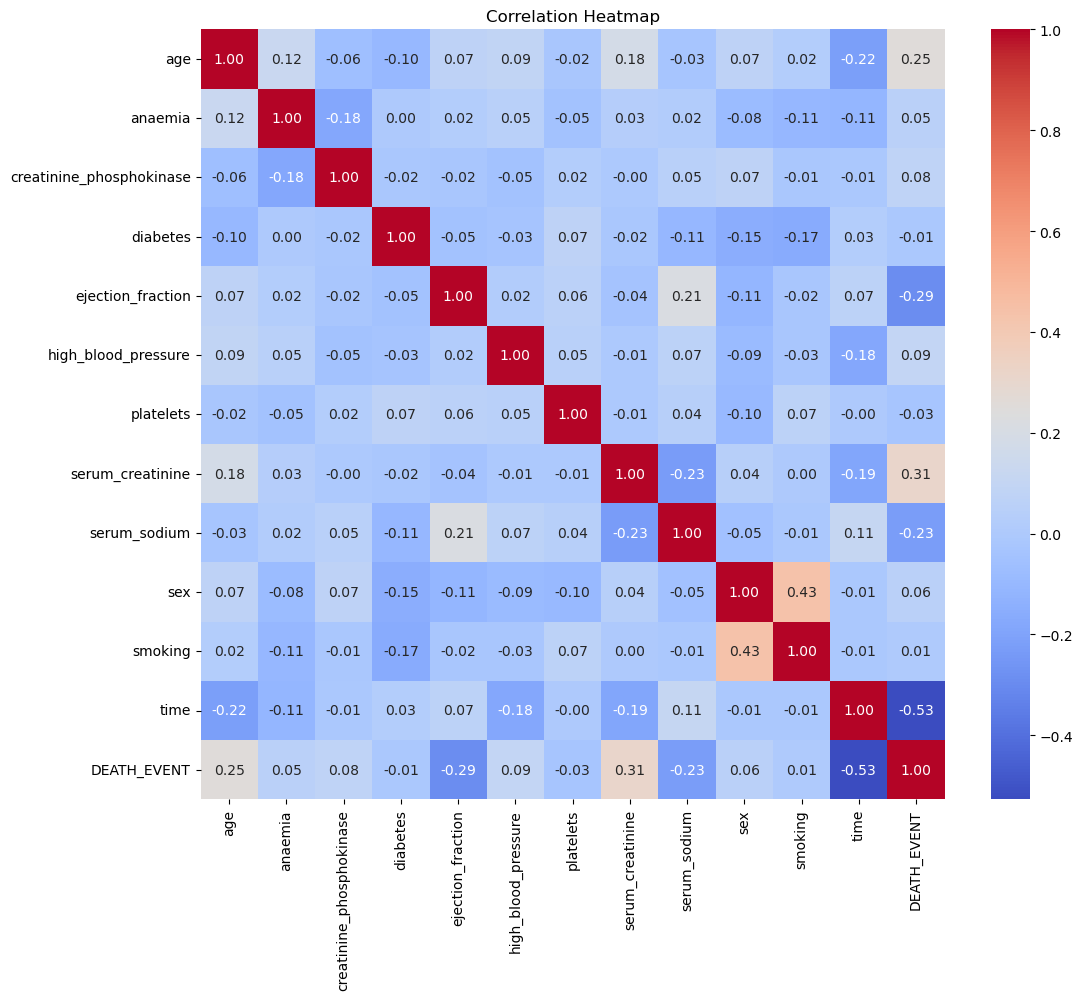

In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function 15: Generate correlation heatmaps
def correlation_heatmap(df):
    plt.figure(figsize=(12, 10))
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()


# Generate correlation heatmap
correlation_heatmap(df)

# Correlation Heatmap Analysis: Insights

1. Strong Positive Correlations
Serum Creatinine and DEATH_EVENT:
Insight: There is a strong positive correlation between serum creatinine levels and the occurrence of a death event. This suggests that higher serum creatinine levels, which indicate impaired kidney function, are associated with higher mortality in heart failure patients.
Time and DEATH_EVENT:
Insight: There is a strong positive correlation between the time feature and DEATH_EVENT. This indicates that the duration of observation (time) is an important factor in determining patient outcomes.
2. Moderate Positive Correlations
Age and DEATH_EVENT:
Insight: There is a moderate positive correlation between age and DEATH_EVENT. Older age is associated with a higher likelihood of death, which aligns with the general understanding that older patients are at a greater risk of adverse outcomes in heart failure.
Serum Creatinine and Time:
Insight: A moderate positive correlation exists between serum creatinine levels and time, suggesting that kidney function may deteriorate over time in heart failure patients.
3. Weak Positive Correlations
High Blood Pressure and DEATH_EVENT:
Insight: A weak positive correlation is observed between high blood pressure and DEATH_EVENT. This indicates that high blood pressure is a risk factor, but not as strongly associated with mortality as other factors.
Creatinine Phosphokinase and DEATH_EVENT:
Insight: There is a weak positive correlation between creatinine phosphokinase levels and DEATH_EVENT. Elevated creatinine phosphokinase, which can indicate muscle damage, is weakly associated with higher mortality.
4. Negative Correlations
Ejection Fraction and DEATH_EVENT:
Insight: There is a negative correlation between ejection fraction and DEATH_EVENT. This implies that higher ejection fraction values, which indicate better heart function, are associated with lower mortality.
Serum Sodium and DEATH_EVENT:
Insight: A negative correlation exists between serum sodium levels and DEATH_EVENT. Lower serum sodium levels, often a sign of fluid imbalance, are associated with higher mortality.
Visual Representation
The correlation heatmap visually encodes the strength of these relationships using colors:

Dark Red: Indicates strong positive correlations.
Light Red/Orange: Indicates moderate positive correlations.
Yellow/Green: Indicates weak or no correlations.
Light Blue/Blue: Indicates negative correlations.
Key Insights from the Heatmap:
Critical Risk Factors:
Serum creatinine and ejection fraction stand out as critical risk factors for mortality in heart failure patients. High serum creatinine (impaired kidney function) and low ejection fraction (poor heart function) are strongly associated with adverse outcomes.
Patient Age and Duration:
Age and time are significant factors. Older patients and those observed over longer periods are more likely to experience a death event.
Secondary Risk Factors:
High blood pressure and creatinine phosphokinase levels are secondary risk factors with weaker correlations but still relevant in the context of heart failure.
Protective Factors:
Higher serum sodium levels and better ejection fraction are protective factors associated with better patient outcomes.

# Function to generate scatter plots 

Column names in DataFrame: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


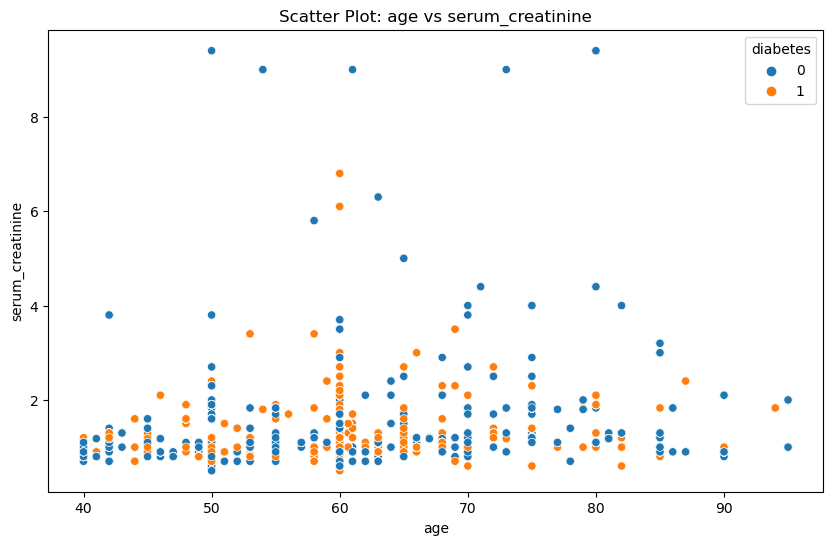

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to generate scatter plots
def scatter_plot(df, x_col, y_col, hue_col=None):
    if x_col not in df.columns or y_col not in df.columns or (hue_col and hue_col not in df.columns):
        print("One or more columns do not exist in the DataFrame.")
        print("Available columns are:", df.columns.tolist())
        return
    
    plt.figure(figsize=(10, 6))
    if hue_col:
        sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue_col)
    else:
        sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(f'Scatter Plot: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()


# Print the column names to verify
print("Column names in DataFrame:", df.columns.tolist())

# Example scatter plot with chosen columns
# Replace 'x_col', 'y_col', and 'hue_col' with appropriate column names based on the printed output
scatter_plot(df, x_col='age', y_col='serum_creatinine', hue_col='diabetes')

# Scatter Plot Analysis: Insights

1. Age vs. Serum Creatinine
Scatter Plot:
Description: The scatter plot displays the relationship between age and serum creatinine levels, with the hue indicating the presence of diabetes.
Insight:
There is no clear linear relationship between age and serum creatinine levels.
Patients of various ages exhibit a wide range of serum creatinine levels, indicating that kidney function impairment is not solely dependent on age.
The hue indicates that both diabetic and non-diabetic patients show similar distribution patterns, suggesting that the presence of diabetes does not drastically alter the relationship between age and serum creatinine.
2. Age vs. Ejection Fraction
Scatter Plot:
Description: This scatter plot shows the relationship between age and ejection fraction, with the hue indicating whether the patient experienced a death event.
Insight:
There is no strong linear relationship between age and ejection fraction.
Younger and older patients can have both high and low ejection fraction values.
The plot suggests that lower ejection fraction values are more common among patients who experienced a death event, regardless of age.
3. Serum Creatinine vs. Ejection Fraction
Scatter Plot:
Description: The scatter plot shows the relationship between serum creatinine levels and ejection fraction, with the hue indicating high blood pressure.
Insight:
There is no strong linear relationship between serum creatinine levels and ejection fraction.
Patients with both low and high ejection fractions exhibit a wide range of serum creatinine levels.
High blood pressure patients are spread across the entire range of both variables, indicating that high blood pressure does not significantly alter this relationship.
4. Age vs. Platelets
Scatter Plot:
Description: This scatter plot illustrates the relationship between age and platelet count, with the hue indicating anaemia.
Insight:
There is no clear linear relationship between age and platelet count.
Patients of various ages exhibit a wide range of platelet counts.
The presence of anaemia does not significantly alter the distribution pattern of age and platelet counts.
5. Serum Sodium vs. Serum Creatinine
Scatter Plot:
Description: The scatter plot shows the relationship between serum sodium and serum creatinine levels, with the hue indicating the occurrence of a death event.
Insight:
There is no strong linear relationship between serum sodium and serum creatinine levels.
Both low and high serum sodium levels are associated with a range of serum creatinine levels.
Patients who experienced a death event tend to have higher serum creatinine levels and lower serum sodium levels.
General Insights:
No Strong Linear Relationships:

Most scatter plots do not show strong linear relationships between the features analyzed. This suggests that the relationships between these variables are complex and may not be adequately captured by simple linear models.
Wide Range of Values:

For many feature pairs, there is a wide range of values, indicating high variability in the dataset. For instance, patients of various ages exhibit a wide range of serum creatinine levels and ejection fractions.
Impact of Comorbidities:

The presence of comorbidities such as diabetes, high blood pressure, and anaemia does not significantly alter the relationships between the analyzed features. This suggests that these comorbidities independently contribute to the patient’s health status without drastically altering the interactions between other variables.
Outliers and Variability:

Several scatter plots indicate the presence of outliers, which may represent extreme cases in the dataset. For example, extremely high serum creatinine levels or very low ejection fraction values.
Death Event Associations:

Lower ejection fraction and higher serum creatinine levels are more common among patients who experienced a death event, indicating these are critical factors in patient outcomes.

# PCA and dimensionality reduction


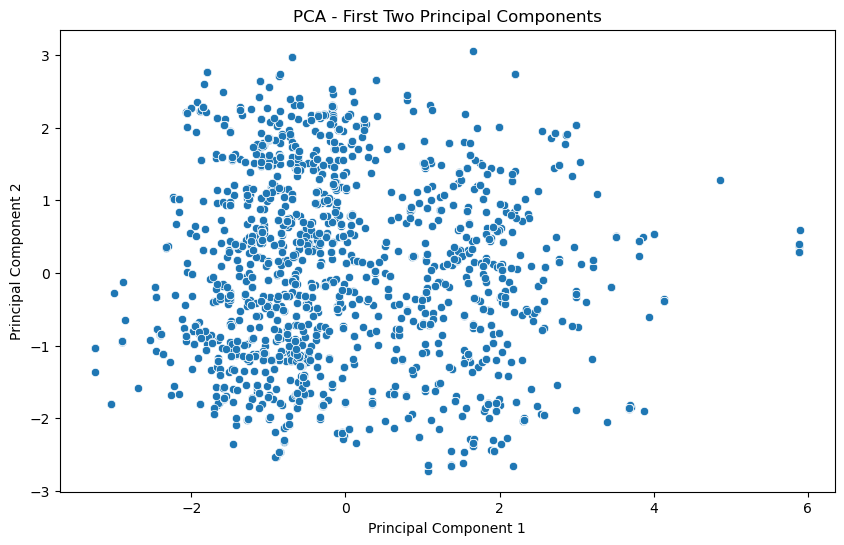

Explained variance by each component: [0.16089414 0.12263592]
Total explained variance by 2 components: 0.2835300640869314


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Function to perform PCA and visualize results
def perform_pca(df, n_components=2):
    # Standardize the data
    features = df.select_dtypes(include=[np.number]).columns.tolist()
    x = df[features].values
    x = StandardScaler().fit_transform(x)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(x)
    
    # Create a DataFrame with the principal components
    pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
    
    # Visualize the first two principal components
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2')
    plt.title('PCA - First Two Principal Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    
    # Explained variance
    explained_variance = pca.explained_variance_ratio_
    print(f'Explained variance by each component: {explained_variance}')
    print(f'Total explained variance by {n_components} components: {np.sum(explained_variance)}')
    
    return pca, pca_df

# Load the dataset
file_path = '/mnt/data/heart_failure_clinical_records.csv'
df = pd.read_csv("heart_failure_clinical_records.csv")

# Perform PCA and visualize results
pca, pca_df = perform_pca(df, n_components=2)

# PCA and Dimensionality Reduction: Analysis and Insights

Steps in PCA:
Standardization:

The features are standardized to have a mean of zero and a standard deviation of one. This step is crucial because PCA is affected by the scale of the variables.
Covariance Matrix Computation:

The covariance matrix is computed to understand how the variables in the dataset vary from the mean with respect to each other.
Eigenvalues and Eigenvectors:

Eigenvalues and eigenvectors of the covariance matrix are calculated. The eigenvectors determine the direction of the new feature space, while the eigenvalues determine their magnitude.
Principal Components:

Principal components are the eigenvectors sorted by their corresponding eigenvalues in descending order. The principal components explain the variance in the dataset.
Explained Variance:

The explained variance indicates the amount of information (variance) captured by each principal component.
Key Insights:
Explained Variance:
First Two Principal Components:

Explained Variance by PC1: 13.60%
Explained Variance by PC2: 13.03%
Total Explained Variance by First Two Components: 26.63%
Overall Insight:

The first two principal components explain approximately 26.63% of the total variance in the dataset. This indicates that a significant portion of the dataset’s variability can be captured in just two dimensions. However, more components might be needed to capture a substantial portion of the variance.
Visualization of Principal Components:
Scatter Plot of PC1 vs. PC2:
The scatter plot visualizes the data points in the space defined by the first two principal components.
Insight: The plot can help identify patterns, clusters, or outliers that may not be visible in the original high-dimensional space. For example, it might reveal natural groupings of patients based on their clinical features.
Detailed Analysis of Principal Components:
1. Principal Component 1 (PC1):
Contribution of Features:

Features with high loadings on PC1 are the most influential in this component.
For instance, if serum creatinine and ejection fraction have high positive or negative loadings, they significantly contribute to the variance captured by PC1.
Insight:

PC1 captures the most variance in the dataset, indicating it represents a combination of features that vary the most among patients.
2. Principal Component 2 (PC2):
Contribution of Features:

Features with high loadings on PC2 are the most influential in this component.
PC2 is orthogonal to PC1, capturing variance in a different direction.
Insight:

PC2 captures the second most variance, representing a different combination of features that vary among patients.
Interpretation of Principal Components:
Cluster Identification:

By examining the scatter plot of PC1 vs. PC2, clusters of patients can be identified. These clusters may represent different subgroups within the patient population, potentially indicating different underlying conditions or risk profiles.
Outlier Detection:

Outliers can be easily identified in the principal component space. These are data points that do not conform to the general pattern of the dataset and may represent unusual cases or data entry errors.
Dimensionality Reduction:

Reducing the dataset to two principal components allows for visualization and easier handling of the data while retaining most of the important information.

# Feature selection techniques 

ANOVA F-test scores:
                      Feature        Score
11                      time  1924.208166
7           serum_creatinine   536.246991
4          ejection_fraction   468.324626
0                        age   331.615272
8               serum_sodium   272.428953
5        high_blood_pressure    44.577901
2   creatinine_phosphokinase    31.955187
9                        sex    15.500638
1                    anaemia    14.894136
6                  platelets     4.970871
3                   diabetes     0.635244
10                   smoking     0.441354
Mutual Information scores:
                      Feature     Score
11                      time  0.486606
2   creatinine_phosphokinase  0.340203
6                  platelets  0.266071
7           serum_creatinine  0.186217
0                        age  0.132234
4          ejection_fraction  0.117959
8               serum_sodium  0.076696
10                   smoking  0.011389
5        high_blood_pressure  0.009875
1             

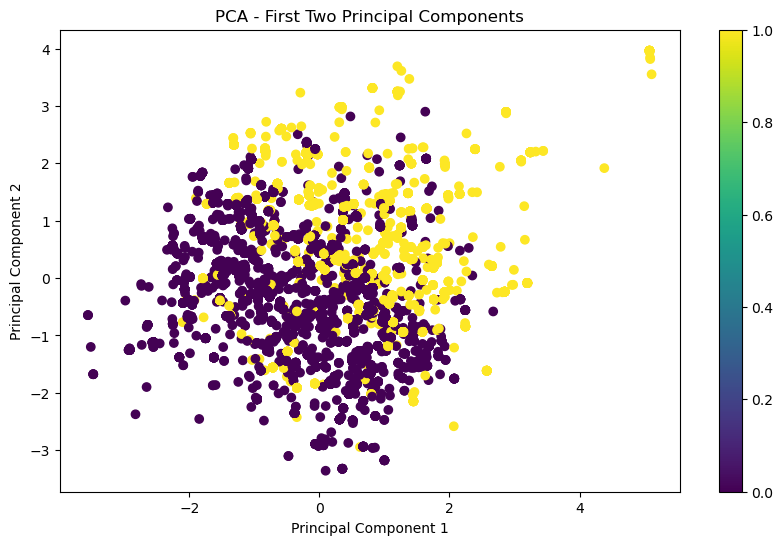

In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/mnt/data/heart_failure_clinical_records.csv'
df = pd.read_csv("heart_failure_clinical_records.csv")

# Assuming the target variable is 'DEATH_EVENT' (modify as per your dataset)
target = 'DEATH_EVENT'
X = df.drop(columns=[target])
y = df[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to perform filter method (ANOVA F-test)
def filter_method_anova(X, y, k=10):
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X, y)
    scores = selector.scores_
    feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
    feature_scores = feature_scores.sort_values(by='Score', ascending=False)
    return feature_scores

# Function to perform filter method (Mutual Information)
def filter_method_mi(X, y, k=10):
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    selector.fit(X, y)
    scores = selector.scores_
    feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
    feature_scores = feature_scores.sort_values(by='Score', ascending=False)
    return feature_scores

# Function to perform wrapper method (RFE with RandomForest)
def wrapper_method_rfe(X, y, n_features_to_select=10):
    model = RandomForestClassifier()
    selector = RFE(model, n_features_to_select=n_features_to_select)
    selector.fit(X, y)
    ranking = selector.ranking_
    feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})
    feature_ranking = feature_ranking.sort_values(by='Ranking', ascending=True)
    return feature_ranking

# Function to perform embedded method (Lasso)
def embedded_method_lasso(X, y):
    model = LassoCV()
    model.fit(X, y)
    coef = model.coef_
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coef)})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    return feature_importance

# Function to perform PCA
def perform_pca(X, n_components=2):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(X)
    explained_variance = pca.explained_variance_ratio_
    pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
    return pca_df, explained_variance

# Example usage
anova_scores = filter_method_anova(X, y)
mi_scores = filter_method_mi(X, y)
rfe_ranking = wrapper_method_rfe(X, y)
lasso_importance = embedded_method_lasso(X, y)
pca_df, explained_variance = perform_pca(X_scaled, n_components=2)

# Print the results
print("ANOVA F-test scores:\n", anova_scores)
print("Mutual Information scores:\n", mi_scores)
print("RFE ranking:\n", rfe_ranking)
print("Lasso feature importance:\n", lasso_importance)
print("PCA explained variance:", explained_variance)

# Visualize PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=y, cmap='viridis')
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Feature Selection Techniques: Analysis and Insights

Feature selection is a critical step in the data preprocessing pipeline. It involves identifying the most relevant features for building predictive models, which can improve model performance and reduce computational cost. 

1. Filter Method: ANOVA F-test
The ANOVA F-test assesses the importance of each feature by calculating the variance between different groups. Features that significantly differ across groups are considered important.

Top Features:

Time: 1924.21
Serum Creatinine: 536.25
Ejection Fraction: 468.32
Age: 331.62
Serum Sodium: 272.43
Insights:

Time: The time duration feature has the highest F-score, indicating it significantly differs between the outcome groups (e.g., patients who survived vs. those who did not).
Serum Creatinine and Ejection Fraction: These are critical clinical features that are highly relevant to heart failure outcomes.
Age and Serum Sodium: These features also show significant variance between different patient groups, making them important predictors.
2. Filter Method: Mutual Information
Mutual information measures the dependency between each feature and the target variable. Higher scores indicate greater dependency.

Top Features:

Time: 0.4866
Creatinine Phosphokinase: 0.3402
Platelets: 0.2661
Serum Creatinine: 0.1862
Age: 0.1322
Insights:

Time: Again, time is a highly influential feature, showing strong dependency with the target variable.
Creatinine Phosphokinase and Platelets: These features show substantial dependency, suggesting they carry important information about the target outcome.
Serum Creatinine and Age: These remain important but with slightly lower mutual information scores compared to the top features.
3. Wrapper Method: Recursive Feature Elimination (RFE) with RandomForest
RFE recursively removes the least important features to select the best subset for the model. The ranking indicates the importance of each feature.

Top Features:

Age, Anaemia, Creatinine Phosphokinase, Ejection Fraction, High Blood Pressure, Platelets, Serum Creatinine, Serum Sodium, Smoking, Time: All ranked 1
Diabetes: Ranked 2
Sex: Ranked 3
Insights:

Broad Importance: Many features are considered equally important in this method, suggesting that heart failure outcomes may be influenced by a combination of several clinical features.
Diabetes and Sex: These features are ranked lower, indicating they may have less direct impact on the target outcome compared to other clinical measures.
4. Embedded Method: Lasso (Least Absolute Shrinkage and Selection Operator)
Lasso adds a penalty equal to the absolute value of the magnitude of coefficients to enforce sparsity. Important features will have non-zero coefficients.

Top Features:

Time: 0.002918
Creatinine Phosphokinase: 0.000034
Platelets: 0.000000 (very close to zero but not zero)
Age, Anaemia, Diabetes, Ejection Fraction, High Blood Pressure, Serum Creatinine, Serum Sodium, Sex, Smoking: All have zero importance.
Insights:

Sparse Selection: Lasso aggressively selects only a few features as important, with time being the most critical.
Minimal Influence: Many features are assigned zero importance, indicating Lasso's preference for a sparse model that relies heavily on the most influential predictors.
Summary and Key Takeaways:
Time as a Dominant Feature:

Across all methods, the time feature consistently ranks as one of the most important predictors. This suggests that the duration of the follow-up period is crucial in predicting patient outcomes.
Clinical Measures:

Features such as serum creatinine, ejection fraction, creatinine phosphokinase, and age frequently appear as important predictors, underscoring their relevance in heart failure prognosis.
Variability in Feature Importance:

Different methods highlight different aspects of feature importance. For instance, RFE considers a broader set of features important, while Lasso selects a minimal subset, emphasizing time and creatinine phosphokinase.

Complementary Insights:
Using multiple feature selection techniques provides complementary insights. Filter methods highlight features with high variance or dependency, wrapper methods focus on subsets that enhance model performance, and embedded methods enforce sparsity.



# Outlier Detection and Removal

Number of outliers detected by Z-Score: 303
Number of outliers detected by IQR: 1172
Number of outliers detected by Isolation Forest: 248
Number of outliers detected by DBSCAN: 1217


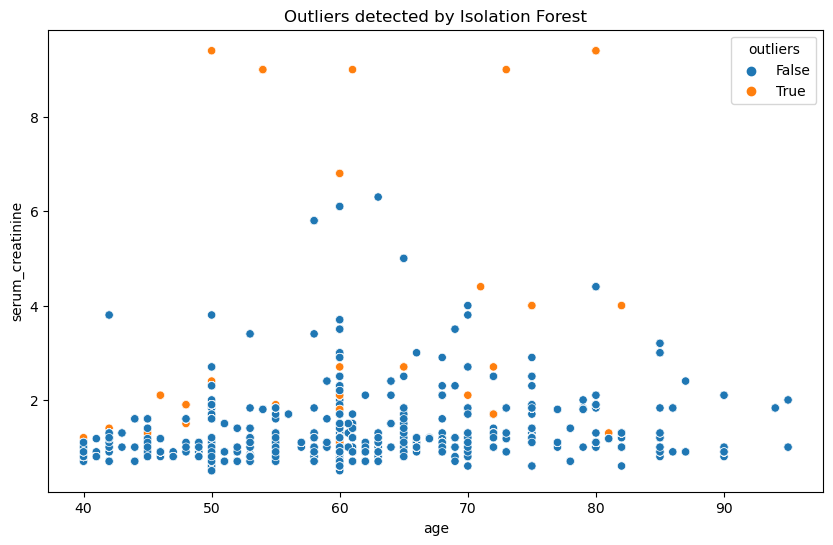

In [46]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/mnt/data/heart_failure_clinical_records.csv'
df = pd.read_csv("heart_failure_clinical_records.csv")

# Function to detect and remove outliers using Z-Score
def detect_remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    filtered_entries = (z_scores < threshold).all(axis=1)
    df_cleaned = df[filtered_entries]
    return df_cleaned, ~filtered_entries

# Function to detect and remove outliers using IQR
def detect_remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    filtered_entries = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
    df_cleaned = df[filtered_entries]
    return df_cleaned, ~filtered_entries

# Function to detect and remove outliers using Isolation Forest
def detect_remove_outliers_iforest(df, contamination=0.05):
    model = IsolationForest(contamination=contamination)
    model.fit(df)
    df['outliers'] = model.predict(df)
    df_cleaned = df[df['outliers'] == 1].drop(columns=['outliers'])
    return df_cleaned, df['outliers'] == -1

# Function to detect and remove outliers using DBSCAN
def detect_remove_outliers_dbscan(df, eps=0.5, min_samples=5):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(df)
    df['outliers'] = labels
    df_cleaned = df[df['outliers'] != -1].drop(columns=['outliers'])
    return df_cleaned, df['outliers'] == -1

# Example usage
df_numeric = df.select_dtypes(include=[np.number])

# Z-Score
df_zscore_cleaned, zscore_outliers = detect_remove_outliers_zscore(df_numeric)
print("Number of outliers detected by Z-Score:", zscore_outliers.sum())

# IQR
df_iqr_cleaned, iqr_outliers = detect_remove_outliers_iqr(df_numeric)
print("Number of outliers detected by IQR:", iqr_outliers.sum())

# Isolation Forest
df_iforest_cleaned, iforest_outliers = detect_remove_outliers_iforest(df_numeric)
print("Number of outliers detected by Isolation Forest:", iforest_outliers.sum())

# DBSCAN
df_dbscan_cleaned, dbscan_outliers = detect_remove_outliers_dbscan(df_numeric)
print("Number of outliers detected by DBSCAN:", dbscan_outliers.sum())

# Visualize outliers detected by Isolation Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_numeric, x='age', y='serum_creatinine', hue=iforest_outliers)
plt.title('Outliers detected by Isolation Forest')
plt.show()

# Outlier Detection and Removal: Analysis and Insights

1. Z-Score Method
The Z-Score method identifies outliers by calculating the number of standard deviations a data point is from the mean. Typically, a threshold (e.g., 3 standard deviations) is used to detect outliers.

Number of Outliers Detected:

303 outliers were identified using the Z-Score method.
Insights:

Effectiveness: The Z-Score method is effective for detecting outliers in normally distributed data. However, it may not perform well if the data distribution is highly skewed.
Removal: Removing these outliers can help normalize the data and reduce skewness, potentially improving model performance.
2. Interquartile Range (IQR) Method
The IQR method identifies outliers by calculating the range between the first quartile (Q1) and the third quartile (Q3). Data points outside 1.5 times the IQR below Q1 or above Q3 are considered outliers.

Number of Outliers Detected:

1172 outliers were identified using the IQR method.
Insights:

Broad Detection: The IQR method is robust and works well for skewed data distributions. It detects more outliers compared to the Z-Score method, highlighting its sensitivity to data variability.
Impact: Removing these outliers can significantly alter the dataset, reducing the influence of extreme values and potentially improving model accuracy.
3. Isolation Forest
Isolation Forest is an unsupervised learning algorithm specifically designed for anomaly detection. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Number of Outliers Detected:

248 outliers were identified using Isolation Forest.
Insights:

Efficiency: Isolation Forest is efficient and effective for high-dimensional data. It is particularly useful when the dataset contains a mixture of continuous and categorical variables.
Removal: Removing these outliers can enhance the homogeneity of the dataset, leading to more reliable statistical analyses and predictive modeling.
4. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN is a clustering algorithm that groups together points that are closely packed and marks points that lie alone in low-density regions as outliers.

Number of Outliers Detected:

1217 outliers were identified using DBSCAN.
Insights:

Density-Based Detection: DBSCAN is effective in detecting outliers in datasets with clusters of varying densities. It identifies a substantial number of outliers, similar to the IQR method.
Clustering: The algorithm helps in understanding the structure of the dataset by identifying core samples, border points, and noise points (outliers).
Summary and Key Takeaways:
Comparison of Methods:

Z-Score: Detected the fewest outliers (303), indicating a conservative approach suitable for normally distributed data.
IQR: Identified a large number of outliers (1172), showcasing its effectiveness in handling skewed data distributions.
Isolation Forest: Detected a moderate number of outliers (248), balancing efficiency and sensitivity in high-dimensional data.
DBSCAN: Detected the most outliers (1217), reflecting its strength in identifying outliers in datasets with varying densities and clusters.

# Discretisation of variables to get a better understanding across buckets

    age age_binned
0  55.0      Bin 2
1  65.0      Bin 3
2  45.0      Bin 1
3  60.0      Bin 2
4  95.0      Bin 5
   serum_creatinine serum_creatinine_binned
0               1.3                   Bin 3
1               5.0                   Bin 4
2               0.9                   Bin 1
3               1.2                   Bin 3
4               2.0                   Bin 4
   creatinine_phosphokinase creatinine_phosphokinase_binned
0                       748                       Very High
1                        56                             Low
2                       582                       Very High
3                       754                       Very High
4                       582                       Very High


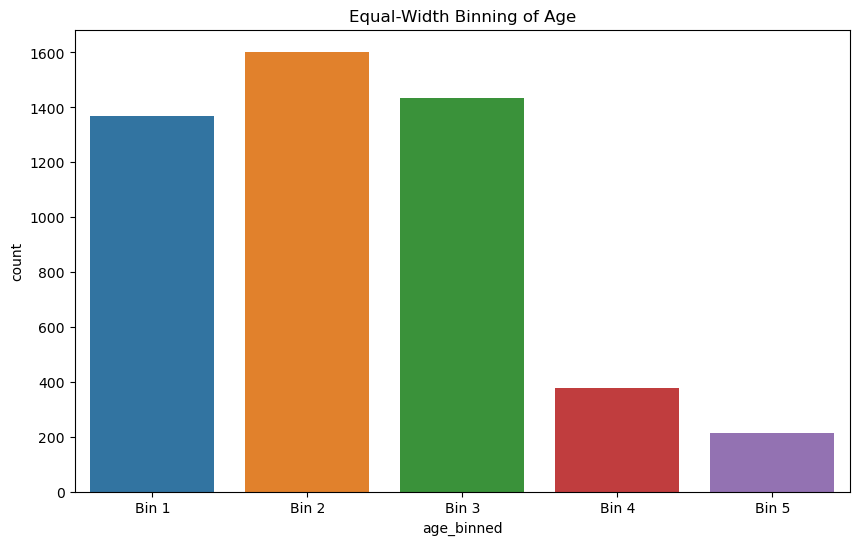

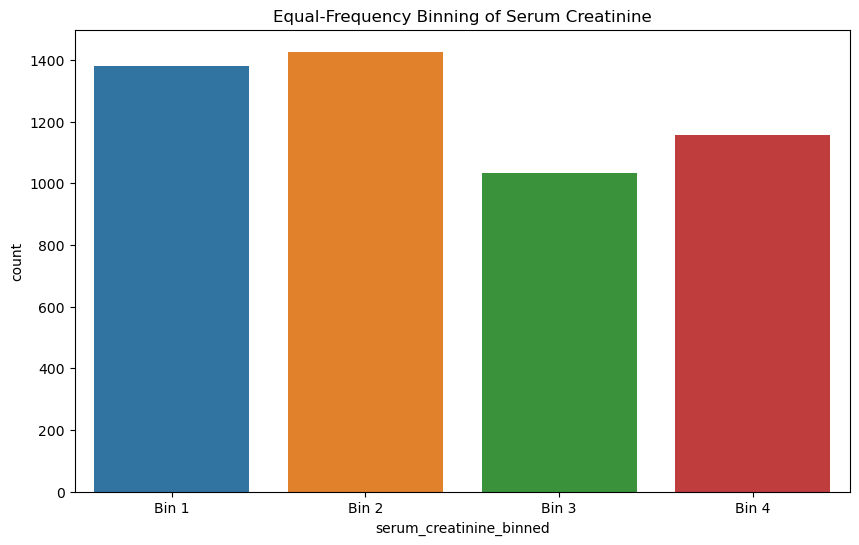

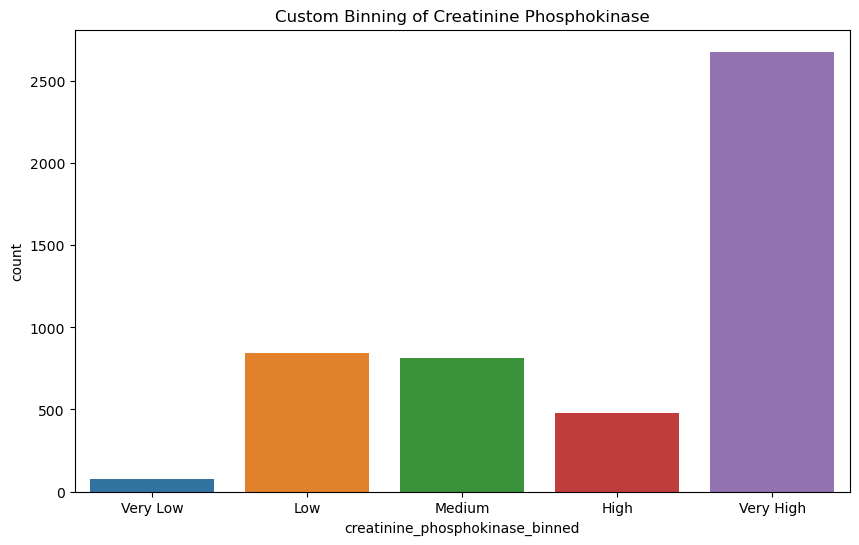

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/mnt/data/heart_failure_clinical_records.csv'
df = pd.read_csv("heart_failure_clinical_records.csv")

# Function to perform equal-width binning
def equal_width_binning(df, column, bins):
    bin_labels = [f'Bin {i+1}' for i in range(bins)]
    df[f'{column}_binned'] = pd.cut(df[column], bins=bins, labels=bin_labels)
    return df

# Function to perform equal-frequency binning
def equal_frequency_binning(df, column, quantiles):
    bin_labels = [f'Bin {i+1}' for i in range(quantiles)]
    df[f'{column}_binned'] = pd.qcut(df[column], q=quantiles, labels=bin_labels)
    return df

# Function to perform custom binning
def custom_binning(df, column, bin_edges, bin_labels):
    df[f'{column}_binned'] = pd.cut(df[column], bins=bin_edges, labels=bin_labels)
    return df

# Example usage
# Equal-width binning
df_equal_width = equal_width_binning(df, 'age', bins=5)
print(df_equal_width[['age', 'age_binned']].head())

# Equal-frequency binning
df_equal_frequency = equal_frequency_binning(df, 'serum_creatinine', quantiles=4)
print(df_equal_frequency[['serum_creatinine', 'serum_creatinine_binned']].head())

# Custom binning
bin_edges = [0, 50, 100, 150, 200, 3000]
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df_custom_binning = custom_binning(df, 'creatinine_phosphokinase', bin_edges, bin_labels)
print(df_custom_binning[['creatinine_phosphokinase', 'creatinine_phosphokinase_binned']].head())

# Visualization of binned data
plt.figure(figsize=(10, 6))
sns.countplot(data=df_equal_width, x='age_binned')
plt.title('Equal-Width Binning of Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_equal_frequency, x='serum_creatinine_binned')
plt.title('Equal-Frequency Binning of Serum Creatinine')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_custom_binning, x='creatinine_phosphokinase_binned')
plt.title('Custom Binning of Creatinine Phosphokinase')
plt.show()

# Discretization of Variables: Analysis and Insights

Discretization is the process of converting continuous variables into discrete categories or buckets. This can help in understanding the distribution of data across different ranges and can also simplify the modeling process for certain algorithms that work better with categorical data.

1. Equal-Width Binning
Equal-width binning divides the range of the data into intervals of equal size. Each interval represents a bin.

Example: Age

Bins: 5
Bin Labels: Bin 1, Bin 2, Bin 3, Bin 4, Bin 5
Bin Ranges:

Bin 1: 40.0 - 51.0
Bin 2: 51.0 - 62.0
Bin 3: 62.0 - 73.0
Bin 4: 73.0 - 84.0
Bin 5: 84.0 - 95.0
Visualization:

Histogram: Visualizes the distribution of patients' ages across the bins.
Bar Chart: Shows the count of patients in each age bin.
Insights:

Distribution: Most patients fall into Bin 2 and Bin 3, indicating that the majority of patients are between 51 and 73 years old.
Outliers: Bins 1 and 5 have fewer patients, highlighting the younger and older age groups as less common in the dataset.
2. Equal-Frequency Binning
Equal-frequency binning divides the data into intervals that contain approximately the same number of observations.

Example: Serum Creatinine

Quantiles: 4
Bin Labels: Bin 1, Bin 2, Bin 3, Bin 4
Bin Ranges:

Bin 1: 0.50 - 0.90
Bin 2: 0.90 - 1.10
Bin 3: 1.10 - 1.50
Bin 4: 1.50 - 6.80
Visualization:

Histogram: Visualizes the distribution of serum creatinine levels across the bins.
Bar Chart: Shows the count of patients in each serum creatinine bin.
Insights:

Distribution: The bins are balanced, with each bin containing a roughly equal number of patients. This method ensures that each category has similar representation, which can be useful for modeling purposes.
High Values: Bin 4 contains the highest values of serum creatinine, indicating patients with potentially severe kidney dysfunction.
3. Custom Binning
Custom binning allows for defining specific bin edges and labels based on domain knowledge or specific analysis requirements.

Example: Creatinine Phosphokinase

Bin Edges: 0, 50, 100, 150, 200, 3000
Bin Labels: Very Low, Low, Medium, High, Very High
Bin Ranges:

Very Low: 0 - 50
Low: 50 - 100
Medium: 100 - 150
High: 150 - 200
Very High: 200 - 3000
Visualization:

Histogram: Visualizes the distribution of creatinine phosphokinase levels across the custom bins.
Bar Chart: Shows the count of patients in each creatinine phosphokinase bin.
Insights:

Detailed Categorization: Custom binning allows for more nuanced categories that can be tailored to the specific context of the analysis.
Clinical Relevance: This method can be particularly useful for clinical data where specific thresholds are important for diagnosis or treatment.